## Mean Reversion Trading

In [715]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.tsa.stattools import coint
import seaborn as sns
plt.rcParams["figure.figsize"] = (20, 10)
import datetime
import yfinance as yf
from IPython.display import clear_output

import time

In [716]:
Stocks=pd.read_csv('ind_nifty100list (1).csv')

In [717]:
Stocks

,Company Name,Industry,Symbol,Series,ISIN Code
0,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
1,Adani Energy Solutions Ltd.,Power,ADANIENSOL,EQ,INE931S01010
2,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024
3,Adani Green Energy Ltd.,Power,ADANIGREEN,EQ,INE364U01010
4,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042
...,...,...,...,...,...
96,Varun Beverages Ltd.,Fast Moving Consumer Goods,VBL,EQ,INE200M01021
97,Vedanta Ltd.,Metals & Mining,VEDL,EQ,INE205A01025
98,Wipro Ltd.,Information Technology,WIPRO,EQ,INE075A01022
99,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015


In [718]:
Stocks['Symbol'] = Stocks['Symbol'].apply(lambda x: x + ".NS" if not x.endswith(".NS") else x)


In [719]:
stock_list=(Stocks['Symbol']).to_list()

In [723]:
correlation=yf.download(tickers=stock_list,period='8d',interval='2m')['Close']


[*********************100%***********************]  101 of 101 completed


In [727]:
correlation=correlation.dropna()

In [728]:
correlation.head()

,ABB.NS,ADANIENSOL.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,ATGL.NS,AWL.NS,...,TORNTPHARM.NS,TRENT.NS,TVSMOTOR.NS,ULTRACEMCO.NS,UPL.NS,VBL.NS,VEDL.NS,WIPRO.NS,ZOMATO.NS,ZYDUSLIFE.NS
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-20 09:15:00+05:30,4305.850098,846.799988,2500.000000,995.549988,827.549988,434.700012,4987.600098,3201.550049,638.000000,350.049988,...,1875.000000,2041.949951,1517.800049,8567.750000,624.200012,908.150024,234.449997,433.750000,100.699997,639.900024
2023-09-20 09:17:00+05:30,4328.299805,851.799988,2508.199951,998.099976,830.150024,436.200012,4956.299805,3204.899902,639.549988,351.399994,...,1878.550049,2047.750000,1524.949951,8572.900391,623.599976,906.000000,235.000000,434.149994,101.500000,639.700012
2023-09-20 09:19:00+05:30,4351.049805,851.299988,2520.300049,999.000000,833.650024,437.250000,4936.149902,3201.449951,639.799988,352.600006,...,1881.650024,2049.850098,1525.900024,8577.750000,625.200012,908.049988,235.449997,435.899994,103.150002,639.799988
2023-09-20 09:21:00+05:30,4363.700195,854.049988,2519.199951,1000.000000,834.200012,437.500000,4959.549805,3210.899902,640.700012,352.450012,...,1888.650024,2047.500000,1528.750000,8571.400391,624.849976,908.400024,235.899994,436.149994,103.099998,640.000000
2023-09-20 09:23:00+05:30,4371.149902,851.150024,2514.649902,997.700012,832.700012,437.299988,4972.000000,3204.649902,639.549988,351.649994,...,1889.099976,2045.449951,1525.949951,8574.599609,623.450012,908.650024,235.350006,435.649994,102.800003,639.950012


In [729]:
correlation=correlation.head(int(2*len(correlation)/3))

In [730]:
correlation2=correlation.tail(int(len(correlation)/3))

In [731]:
filtered_column = 'Symbol'  # Replace with the actual column name
Stocks = Stocks[Stocks[filtered_column].isin(correlation.columns)]

In [732]:
import pandas as pd

# Assuming you have a DataFrame called 'Stocks' with a 'Symbol' column
symbols = Stocks['Symbol'].tolist()

# Generate pairs of stocks without duplicates
pairs = [(symbols[i], symbols[j]) for i in range(len(symbols)) for j in range(i+1, len(symbols))]

# Create a new DataFrame with the pairs
pairs_df = pd.DataFrame(pairs, columns=['Stock 1', 'Stock 2'])
pairs_df

,Stock 1,Stock 2
0,ABB.NS,ADANIENSOL.NS
1,ABB.NS,ADANIENT.NS
2,ABB.NS,ADANIGREEN.NS
3,ABB.NS,ADANIPORTS.NS
4,ABB.NS,ATGL.NS
...,...,...
5045,VEDL.NS,ZOMATO.NS
5046,VEDL.NS,ZYDUSLIFE.NS
5047,WIPRO.NS,ZOMATO.NS
5048,WIPRO.NS,ZYDUSLIFE.NS


In [733]:
import pandas as pd
from statsmodels.tsa.stattools import coint

def perform_cointegration_test(series1, series2):
    """
    Perform a cointegration test on two pandas Series using the statsmodels coint function.

    Args:
        series1 (pd.Series): The first time series.
        series2 (pd.Series): The second time series.

    Returns:
        (bool, float): A tuple containing a boolean indicating whether the series are cointegrated
                      and the p-value of the cointegration test.
    """
    # Ensure the series have the same index
    series1, series2 = series1.align(series2, join='inner')
    
    # Perform the cointegration test
    _, p_value, _ = coint(series1, series2)
    
    # Determine if the series are cointegrated based on the p-value
    is_cointegrated = p_value < 0.05  # You can adjust the significance level as needed
    
    return  p_value


def calculate_correlation(series1, series2):
    return series1.corr(series2)


In [734]:
correlation

,ABB.NS,ADANIENSOL.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,ATGL.NS,AWL.NS,...,TORNTPHARM.NS,TRENT.NS,TVSMOTOR.NS,ULTRACEMCO.NS,UPL.NS,VBL.NS,VEDL.NS,WIPRO.NS,ZOMATO.NS,ZYDUSLIFE.NS
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-09-20 09:15:00+05:30,4305.850098,846.799988,2500.000000,995.549988,827.549988,434.700012,4987.600098,3201.550049,638.000000,350.049988,...,1875.000000,2041.949951,1517.800049,8567.750000,624.200012,908.150024,234.449997,433.750000,100.699997,639.900024
2023-09-20 09:17:00+05:30,4328.299805,851.799988,2508.199951,998.099976,830.150024,436.200012,4956.299805,3204.899902,639.549988,351.399994,...,1878.550049,2047.750000,1524.949951,8572.900391,623.599976,906.000000,235.000000,434.149994,101.500000,639.700012
2023-09-20 09:19:00+05:30,4351.049805,851.299988,2520.300049,999.000000,833.650024,437.250000,4936.149902,3201.449951,639.799988,352.600006,...,1881.650024,2049.850098,1525.900024,8577.750000,625.200012,908.049988,235.449997,435.899994,103.150002,639.799988
2023-09-20 09:21:00+05:30,4363.700195,854.049988,2519.199951,1000.000000,834.200012,437.500000,4959.549805,3210.899902,640.700012,352.450012,...,1888.650024,2047.500000,1528.750000,8571.400391,624.849976,908.400024,235.899994,436.149994,103.099998,640.000000
2023-09-20 09:23:00+05:30,4371.149902,851.150024,2514.649902,997.700012,832.700012,437.299988,4972.000000,3204.649902,639.549988,351.649994,...,1889.099976,2045.449951,1525.949951,8574.599609,623.450012,908.650024,235.350006,435.649994,102.800003,639.950012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27 12:25:00+05:30,4206.299805,818.400024,2479.899902,1014.599976,831.549988,429.750000,5113.649902,3302.550049,629.000000,342.950012,...,1847.550049,2098.000000,1531.000000,8254.000000,615.599976,965.200012,211.300003,414.500000,99.400002,604.150024
2023-09-27 12:27:00+05:30,4210.450195,818.500000,2480.000000,1014.500000,831.599976,429.700012,5109.549805,3302.000000,629.099976,342.899994,...,1848.900024,2098.649902,1531.750000,8254.549805,615.750000,965.150024,211.350006,414.350006,99.400002,604.299988
2023-09-27 12:29:00+05:30,4207.399902,818.099976,2480.000000,1014.799988,831.400024,429.700012,5111.600098,3302.449951,629.099976,342.899994,...,1848.750000,2098.100098,1530.099976,8253.950195,615.849976,966.250000,211.350006,414.200012,99.400002,604.049988


In [735]:
perform_cointegration_test(correlation[pairs_df['Stock 1'][34]],correlation[pairs_df['Stock 2'][34]])

0.8728930205117218

In [736]:
%%time
results_list = []
# Iterate through the pairs in 'pairs_df' and perform cointegration tests
for index, row in pairs_df.iterrows():
    stock_1 = row['Stock 1']
    stock_2 = row['Stock 2']
    
    # Extract the corresponding time series data
    series1 = correlation[stock_1]
    series2 = correlation[stock_2]
    
    # Perform the cointegration test
    _, p_value, _ = coint(series1, series2)
    
    # Calculate the correlation
    corr = calculate_correlation(series1, series2)
    
    # Create a DataFrame for the current pair and add it to the list
    result_df = pd.DataFrame({'Stock 1': stock_1,
                              'Stock 2': stock_2,
                              'Cointegration Strength': 1-p_value,
                              'Correlation': corr}, index=[0])
    
    results_list.append(result_df)

# Concatenate the list of DataFrames into a single results DataFrame
results_df = pd.concat(results_list, ignore_index=True)
results_df

CPU times: total: 5min 9s
Wall time: 1min 35s


,Stock 1,Stock 2,Cointegration Strength,Correlation
0,ABB.NS,ADANIENSOL.NS,0.269504,0.645089
1,ABB.NS,ADANIENT.NS,0.421573,0.608619
2,ABB.NS,ADANIGREEN.NS,0.468917,-0.497346
3,ABB.NS,ADANIPORTS.NS,0.452508,-0.020892
4,ABB.NS,ATGL.NS,0.198424,0.469683
...,...,...,...,...
5045,VEDL.NS,ZOMATO.NS,0.026567,0.524877
5046,VEDL.NS,ZYDUSLIFE.NS,0.038722,0.641000
5047,WIPRO.NS,ZOMATO.NS,0.317329,0.514438
5048,WIPRO.NS,ZYDUSLIFE.NS,0.640000,0.911659


In [737]:
symbol_to_industry = Stocks.set_index('Symbol')['Industry'].to_dict()
results_df['Industry_Stock1'] = results_df['Stock 1'].map(symbol_to_industry)
results_df['Industry_Stock2'] = results_df['Stock 2'].map(symbol_to_industry)

In [738]:
results_df=results_df.loc[(results_df['Cointegration Strength']>0.95) & (results_df['Industry_Stock1']==results_df['Industry_Stock2'])].sort_values('Correlation',ascending=False)

In [742]:
results_df.reset_index(inplace=True)

## Building a function that gives returns for various values of Cointegration pval and correlation

In [741]:
%%time

def Backtest(i):

    ##Ratio calculation:
    stock1=results_df['Stock 1'][i]
    stock2=results_df['Stock 2'][i]
    df=correlation[[stock1,stock2]]
    correlation_coefficient=results_df['Correlation'][i]
    cointegration_test_pvalue=results_df['Cointegration Strength'][i]

    ratio_df=pd.DataFrame()

    for i, stock1 in enumerate(df.columns):
        for j, stock2 in enumerate(df.columns):
            if i < j:  # Avoid duplicates
                ratio_name = f'{stock1}/{stock2}'
                if ratio_name not in ratio_df.columns:
                    ratio = df[stock1] / df[stock2]
                    ratio_df[ratio_name] = ratio

                # Add individual stock1 and stock2 data with column names as stock symbols
                ratio_df[stock1] = df[stock1]
                ratio_df[stock2] = df[stock2]


    ##Calculating deviations:

    # Define the rolling window size
    rolling_window = 200

    # Initialize empty lists and variables
    adf_results, ratio_data, stock1_prices, stock2_prices = [], [], [], []

    # Loop through the data
    for i in range(rolling_window, len(ratio_df)):
        # Extract rolling data and calculate ADF statistic
        rolling_data = ratio_df[ratio_df.columns[0]].iloc[i - rolling_window:i]
        adf_statistic = adfuller(rolling_data)[1]

        # Extract stock symbols
        stock_symbols = ratio_df.columns[0].split('/')
        stock1, stock2 = stock_symbols[0], stock_symbols[1]

        # Append individual stock prices
        stock1_prices.append(df[stock1].iloc[i])
        stock2_prices.append(df[stock2].iloc[i])

        # Append ADF statistic and ratio data
        adf_results.append(adf_statistic)
        ratio_data.append(ratio_df[ratio_df.columns[0]].iloc[i])

    # Create a DataFrame with results
    adf_statistic_df = pd.DataFrame({
        'Ratio Data': ratio_data,
        'ADF Statistic': adf_results,
        f'{stock_symbols[0]}': stock1_prices,
        f'{stock_symbols[1]}': stock2_prices
    }, index=ratio_df.index[rolling_window:])

    # Calculate rolling mean and standard deviation
    rolling_mean = adf_statistic_df['Ratio Data'].rolling(window=rolling_window).mean()
    rolling_std = adf_statistic_df['Ratio Data'].rolling(window=rolling_window).std()

    # Add rolling statistics columns
    adf_statistic_df['Rolling Mean'] = rolling_mean
    adf_statistic_df['2.5x Std'] = rolling_mean + 2.5 * rolling_std
    adf_statistic_df['-2.5x Std'] = rolling_mean - 2.5 * rolling_std
    adf_statistic_df['3x Std'] = rolling_mean + 3 * rolling_std
    adf_statistic_df['-3x Std'] = rolling_mean - 3 * rolling_std

    # Display the updated DataFrame
    adf_statistic_df.reset_index(inplace=True)


    ##Setting the Marker conditions:

    condition_01 = adf_statistic_df['ADF Statistic'] <= 0.05
    condition_2 = ((adf_statistic_df['Ratio Data'] > adf_statistic_df['3x Std']) | (adf_statistic_df['Ratio Data'] > adf_statistic_df['2.5x Std']) )
    condition_3 = ((adf_statistic_df['Ratio Data'] < adf_statistic_df['-3x Std']) | (adf_statistic_df['Ratio Data'] < adf_statistic_df['-2.5x Std']))

    adf_statistic_df['Marker'] = 0
    # Update 'Marker' column where condition_1 and condition_2 hold to -1
    adf_statistic_df.loc[condition_01 & condition_2, 'Marker'] = -1
    # Update 'Marker' column102 where condition_1 and condition_3 hold to 1
    adf_statistic_df.loc[condition_01 & condition_3, 'Marker'] = 1

    indices=adf_statistic_df.loc[adf_statistic_df['Marker']!=0].index
    indices


    ##Writing the trade logic
    flag = 0
    in_trade = False

    # Define the cutoff time
    cutoff_time = datetime.time(15, 10)

    # Iterate through the DataFrame
    for index, row in adf_statistic_df.iterrows():
        if in_trade:
            if flag == 1 and (row['Ratio Data'] > row['Rolling Mean']):
                adf_statistic_df.at[index, 'Marker'] = 2  # Exit the long trade
                in_trade = False
            elif flag == -1 and (row['Ratio Data'] < row['Rolling Mean']):
                adf_statistic_df.at[index, 'Marker'] = 2  # Exit the short trade
                in_trade = False
            else:
                adf_statistic_df.at[index, 'Marker'] = 0  # Continue in the trade
        elif row['Datetime'].time() <= cutoff_time:
            if row['Marker'] == 1:
                flag = 1
                adf_statistic_df.at[index, 'Marker'] = 1  # Enter long trade
                in_trade = True
            elif row['Marker'] == -1:
                flag = -1
                adf_statistic_df.at[index, 'Marker'] = -1  # Enter short trade
                in_trade = True
            else:
                adf_statistic_df.at[index, 'Marker'] = 0  # No trade
        else:
            adf_statistic_df.at[index, 'Marker'] = 0  # No trade after cutoff time

    adf_statistic_df
    ##Building profits array:
    resultantdf=adf_statistic_df.loc[adf_statistic_df['Marker']!=0]
    indices=resultantdf.index


    profits = []
    holdingtime = []


    for i in range(0, len(resultantdf) - 1, 2):
        entry_index = resultantdf.index[i]
        exit_index = resultantdf.index[i + 1]

        if(resultantdf['Marker'][entry_index]==-1):
            stock1_sell=resultantdf[resultantdf.columns[3]][entry_index]
            stock1_buy=resultantdf[resultantdf.columns[3]][exit_index]

            stock2_sell=resultantdf[resultantdf.columns[4]][exit_index]
            stock2_buy=resultantdf[resultantdf.columns[4]][entry_index]

            profit=5*(((stock1_sell-stock1_buy)/stock1_buy)+((stock2_sell-stock2_buy)/stock2_buy))
            profits.append(profit)

        if(resultantdf['Marker'][entry_index]==1):
            stock1_sell=resultantdf[resultantdf.columns[3]][exit_index]
            stock1_buy=resultantdf[resultantdf.columns[3]][entry_index]

            stock2_sell=resultantdf[resultantdf.columns[4]][entry_index]
            stock2_buy=resultantdf[resultantdf.columns[4]][exit_index]

            profit=5*(((stock1_sell-stock1_buy)/stock1_buy)+((stock2_sell-stock2_buy)/stock2_buy))
            profits.append(profit)

    profits=np.array(profits)-2*0.000223        
    np.sum(profits)               
    return stock1,stock2,correlation_coefficient,cointegration_test_pvalue,np.sum(profits),len(profits)

CPU times: total: 0 ns
Wall time: 0 ns


In [743]:
Backtest(1)

('ICICIGI.NS', 'MUTHOOTFIN.NS', 0.948050099112846, 0.9814090099436068, 0.0, 0)

In [745]:
Comprehensive_results=[]
import numpy as np


In [746]:

start_index = 0
end_index = len(results_df)
segment_size = 10  # Number of iterations to run in each segment

for i in range(start_index, end_index):
    start_time = time.time()  # Record the start time
    Comprehensive_results.append(Backtest(i))
    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time  # Calculate elapsed time
     
        
        
    print(f'{i} is done. Elapsed Time: {elapsed_time:.2f} seconds')

    # Check if a segment is completed
    if (i + 1) % segment_size == 0:
        # Clear the output of the cell
        clear_output(wait=True)

        # Print a message indicating the progress
        print(f'Processed {i + 1} out of {end_index} iterations')

        time.sleep(0.1)  # Adjust the sleep duration as needed


Processed 50 out of 53 iterations
50 is done. Elapsed Time: 3.69 seconds
51 is done. Elapsed Time: 3.70 seconds
52 is done. Elapsed Time: 3.64 seconds


In [756]:
ComprehensiveDf=pd.DataFrame(Comprehensive_results,columns=['Stock1','Stock2','Correlation','Cointegration','Returns','NumberOfTrades'])

In [757]:
ComprehensiveMasterDf=ComprehensiveDf

In [749]:
symbol_to_industry = Stocks.set_index('Symbol')['Industry'].to_dict()

# Add Industry columns for Stock1 and Stock2 to df1
ComprehensiveDf['Industry_Stock1'] = ComprehensiveDf['Stock1'].map(symbol_to_industry)
ComprehensiveDf['Industry_Stock2'] = ComprehensiveDf['Stock2'].map(symbol_to_industry)
ComprehensiveDf

,Stock1,Stock2,Correlation,Cointegration,Returns,NumberOfTrades,Industry_Stock1,Industry_Stock2
0,LICI.NS,SBILIFE.NS,0.953721,0.996309,0.000000,0,Financial Services,Financial Services
1,ICICIGI.NS,MUTHOOTFIN.NS,0.948050,0.981409,0.000000,0,Financial Services,Financial Services
2,HDFCBANK.NS,SBILIFE.NS,0.934735,0.976338,0.044906,3,Financial Services,Financial Services
3,NTPC.NS,TATAPOWER.NS,0.932877,0.979016,0.040853,1,Power,Power
4,HAL.NS,SIEMENS.NS,0.928890,0.961481,0.000000,0,Capital Goods,Capital Goods
5,LICI.NS,MUTHOOTFIN.NS,0.927376,0.963278,0.000000,0,Financial Services,Financial Services
6,ICICIGI.NS,LICI.NS,0.926555,0.970750,0.000000,0,Financial Services,Financial Services
7,CIPLA.NS,TORNTPHARM.NS,0.918275,0.966599,0.000000,0,Healthcare,Healthcare
8,TORNTPHARM.NS,ZYDUSLIFE.NS,0.917937,0.982807,0.000000,0,Healthcare,Healthcare
9,SUNPHARMA.NS,TORNTPHARM.NS,0.917164,0.972316,0.000000,0,Healthcare,Healthcare


In [750]:
ComprehensiveMasterDf['Cointegration']

0     0.996309
1     0.981409
2     0.976338
3     0.979016
4     0.961481
5     0.963278
6     0.970750
7     0.966599
8     0.982807
9     0.972316
10    0.960775
11    0.975880
12    0.954100
13    0.970276
14    0.995054
15    0.996014
16    0.993101
17    0.991864
18    0.986951
19    0.970762
20    0.996212
21    0.958564
22    0.995536
23    0.950545
24    0.969271
25    0.990053
26    0.995530
27    0.964638
28    0.976412
29    0.998878
30    0.996926
31    0.960974
32    0.992894
33    0.971967
34    0.955981
35    0.966566
36    0.996029
37    0.966047
38    0.958677
39    0.969259
40    0.967281
41    0.995910
42    0.971806
43    0.962583
44    0.964162
45    0.989937
46    0.993223
47    0.950169
48    0.988364
49    0.984939
50    0.990137
51    0.979589
52    0.993475
Name: Cointegration, dtype: float64

In [670]:
ComprehensiveDf=ComprehensiveMasterDf

In [758]:
ComprehensiveDf=ComprehensiveDf.sort_values('Cointegration',ascending=False).head(10)

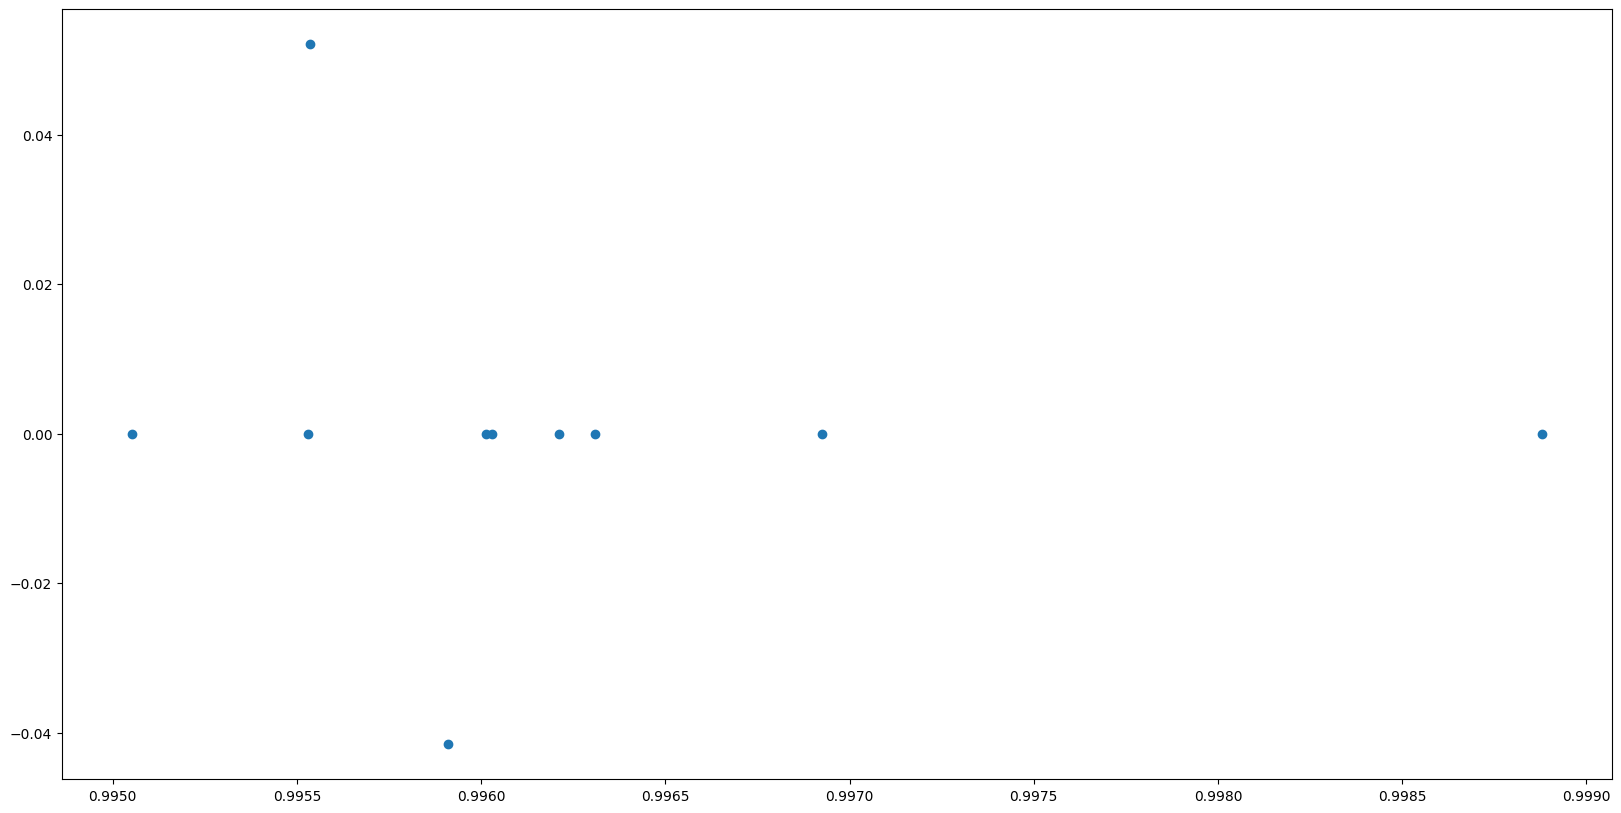

In [759]:
plt.scatter((ComprehensiveDf['Cointegration']),ComprehensiveDf['Returns'])

In [760]:
import matplotlib.pyplot as plt

# Assuming you have already created ComprehensiveDf with 'Industry_Stock1' and 'Industry_Stock2' columns
# Create a column 'SameIndustry' to identify if industries are the same
ComprehensiveDf['SameIndustry'] = (ComprehensiveDf['Industry_Stock1'] == ComprehensiveDf['Industry_Stock2']).astype(int)

fig, axs = plt.subplots(1, 4, figsize=(18, 6))

# Extract data from the DataFrame
x = ComprehensiveDf['Correlation']
y = ComprehensiveDf['Cointegration']
z = ComprehensiveDf['Returns']
same_industry_mask = ComprehensiveDf['SameIndustry'] == 1

# Scatter Plot: Correlation vs. Cointegration
axs[0].scatter(x[~same_industry_mask], y[~same_industry_mask], c='b', marker='o', label='Different Industries', alpha=0.3)
axs[0].scatter(x[same_industry_mask], y[same_industry_mask], c='r', marker='o', label='Same Industries', alpha=0.7)
axs[0].set_xlabel('Correlation')
axs[0].set_ylabel('Cointegration')
axs[0].set_title('Correlation vs. Cointegration')
axs[0].legend()

# Scatter Plot: Correlation vs. Returns
axs[1].scatter(x[~same_industry_mask], z[~same_industry_mask], c='b', marker='o', label='Different Industries', alpha=0.3)
axs[1].scatter(x[same_industry_mask], z[same_industry_mask], c='r', marker='o', label='Same Industries', alpha=0.7)
axs[1].set_xlabel('Correlation')
axs[1].set_ylabel('Returns')
axs[1].set_title('Correlation vs. Returns')
axs[1].legend()

# Scatter Plot: Cointegration vs. Returns
axs[2].scatter(y[~same_industry_mask], z[~same_industry_mask], c='b', marker='o', label='Different Industries', alpha=0.3)
axs[2].scatter(y[same_industry_mask], z[same_industry_mask], c='r', marker='o', label='Same Industries', alpha=0.7)
axs[2].set_xlabel('Cointegration')
axs[2].set_ylabel('Returns')
axs[2].set_title('Cointegration vs. Returns')
axs[2].legend()

# Box Plot: SameIndustry vs. Returns
axs[3].boxplot([z[~same_industry_mask], z[same_industry_mask]], labels=['Different Industries', 'Same Industries'])
axs[3].set_ylabel('Returns')
axs[3].set_title('SameIndustry vs. Returns')

plt.tight_layout()  # Adjust subplot spacing
plt.show()


KeyError: 'Industry_Stock1'

In [761]:
SameStockComprehensiveDf=ComprehensiveDf.loc[(ComprehensiveDf['SameIndustry']==1) & (ComprehensiveDf['Cointegration']>=0.95)]
DifferentStockComprehensiveDf=ComprehensiveDf.loc[(ComprehensiveDf['SameIndustry']!=1) & (ComprehensiveDf['Cointegration']>=0.95)]

KeyError: 'SameIndustry'

In [692]:
SameStockComprehensiveDf['Returns'].corr(SameStockComprehensiveDf['Cointegration']),SameStockComprehensiveDf['Returns'].corr(SameStockComprehensiveDf['Correlation'])

(-0.011942502995078952, 0.062141043026583916)

In [676]:
(len(SameStockComprehensiveDf['Returns'].loc[SameStockComprehensiveDf['Returns']>0])/len(SameStockComprehensiveDf['Returns'])),(len(DifferentStockComprehensiveDf['Returns'].loc[DifferentStockComprehensiveDf['Returns']>0])/len(DifferentStockComprehensiveDf['Returns']))

ZeroDivisionError: division by zero

In [677]:
ComprehensiveDf['NumberOfTrades'].sum(),SameStockComprehensiveDf['NumberOfTrades'].sum(),DifferentStockComprehensiveDf['NumberOfTrades'].sum()

(7, 7, 0)

In [763]:
ComprehensiveDf.loc[ComprehensiveDf['Returns']>0]

,Stock1,Stock2,Correlation,Cointegration,Returns,NumberOfTrades
22,LTIM.NS,TCS.NS,0.785346,0.995536,0.052107,1


In [764]:
ComprehensiveDf['Returns'].mean()

0.0010558600729918606

In [429]:
ComprehensiveDf['Returns'].mean(),SameStockComprehensiveDf['Returns'].mean(),DifferentStockComprehensiveDf['Returns'].mean()

(0.002024670646549717, 0.061607107538786315, 0.03175419676331224)

In [432]:
ComprehensiveDf['Returns'].min(),SameStockComprehensiveDf['Returns'].min(),DifferentStockComprehensiveDf['Returns'].min()

(-0.6523879514139408, -0.05946579967823947, -0.40520737617428626)

In [684]:
%%time
results_list = []
# Iterate through the pairs in 'pairs_df' and perform cointegration tests
for index, row in pairs_df.iterrows():
    stock_1 = row['Stock 1']
    stock_2 = row['Stock 2']
    
    # Extract the corresponding time series data
    series1 = correlation2[stock_1]
    series2 = correlation2[stock_2]
    
    # Perform the cointegration test
    _, p_value, _ = coint(series1, series2)
    
    # Calculate the correlation
    corr = calculate_correlation(series1, series2)
    
    # Create a DataFrame for the current pair and add it to the list
    result_df = pd.DataFrame({'Stock 1': stock_1,
                              'Stock 2': stock_2,
                              'Cointegration Strength': 1-p_value,
                              'Correlation': corr}, index=[0])
    
    results_list.append(result_df)

# Concatenate the list of DataFrames into a single results DataFrame
results_df = pd.concat(results_list, ignore_index=True)
results_df

CPU times: total: 2min 39s
Wall time: 56.2 s


,Stock 1,Stock 2,Cointegration Strength,Correlation
0,ABB.NS,ADANIENSOL.NS,0.986053,0.719963
1,ABB.NS,ADANIENT.NS,0.863378,0.529092
2,ABB.NS,ADANIGREEN.NS,0.952944,0.321414
3,ABB.NS,ADANIPORTS.NS,0.970482,0.565685
4,ABB.NS,ATGL.NS,0.910279,0.626488
...,...,...,...,...
5045,VEDL.NS,ZOMATO.NS,0.794411,0.088402
5046,VEDL.NS,ZYDUSLIFE.NS,0.776277,-0.018569
5047,WIPRO.NS,ZOMATO.NS,0.291651,0.803734
5048,WIPRO.NS,ZYDUSLIFE.NS,0.097505,0.119144


In [685]:
cointegration_strength_map = {(row['Stock 1'], row['Stock 2']): row['Cointegration Strength'] for _, row in results_df.iterrows()}

# Add a new column 'CorrespondingCointegrationStrength' to ComprehensiveDf based on Stock1 and Stock2 pairs
ComprehensiveDf['Insample Cointegration Strength'] = ComprehensiveDf.apply(
    lambda row: cointegration_strength_map.get((row['Stock1'], row['Stock2']), None), axis=1
)

# Display the updated ComprehensiveDf
ComprehensiveDf

,Stock1,Stock2,Correlation,Cointegration,Returns,NumberOfTrades,Industry_Stock1,Industry_Stock2,SameIndustry,Insample Cointegration Strength
0,HAL.NS,SIEMENS.NS,0.954745,0.975293,0.000000,0,Capital Goods,Capital Goods,1,0.268639
1,CIPLA.NS,SUNPHARMA.NS,0.942101,0.962268,0.000000,0,Healthcare,Healthcare,1,0.991868
2,NTPC.NS,TATAPOWER.NS,0.937723,0.966010,0.000000,0,Power,Power,1,0.418522
3,CIPLA.NS,DIVISLAB.NS,0.937142,0.984170,0.000000,0,Healthcare,Healthcare,1,0.896112
4,LICI.NS,SBILIFE.NS,0.932928,0.981884,0.000000,0,Financial Services,Financial Services,1,0.746267
5,DIVISLAB.NS,ZYDUSLIFE.NS,0.925829,0.963226,0.000000,0,Healthcare,Healthcare,1,0.910252
6,HDFCBANK.NS,SBILIFE.NS,0.923804,0.963220,0.046787,1,Financial Services,Financial Services,1,0.881111
7,SUNPHARMA.NS,TORNTPHARM.NS,0.923457,0.964291,0.000000,0,Healthcare,Healthcare,1,0.150311
8,HDFCBANK.NS,MUTHOOTFIN.NS,0.908395,0.953048,0.000000,0,Financial Services,Financial Services,1,0.425922
9,BOSCHLTD.NS,HEROMOTOCO.NS,0.906898,0.958619,0.000000,0,Automobile and Auto Components,Automobile and Auto Components,1,0.845139


In [686]:
ComprehensiveDf

,Stock1,Stock2,Correlation,Cointegration,Returns,NumberOfTrades,Industry_Stock1,Industry_Stock2,SameIndustry,Insample Cointegration Strength
0,HAL.NS,SIEMENS.NS,0.954745,0.975293,0.000000,0,Capital Goods,Capital Goods,1,0.268639
1,CIPLA.NS,SUNPHARMA.NS,0.942101,0.962268,0.000000,0,Healthcare,Healthcare,1,0.991868
2,NTPC.NS,TATAPOWER.NS,0.937723,0.966010,0.000000,0,Power,Power,1,0.418522
3,CIPLA.NS,DIVISLAB.NS,0.937142,0.984170,0.000000,0,Healthcare,Healthcare,1,0.896112
4,LICI.NS,SBILIFE.NS,0.932928,0.981884,0.000000,0,Financial Services,Financial Services,1,0.746267
5,DIVISLAB.NS,ZYDUSLIFE.NS,0.925829,0.963226,0.000000,0,Healthcare,Healthcare,1,0.910252
6,HDFCBANK.NS,SBILIFE.NS,0.923804,0.963220,0.046787,1,Financial Services,Financial Services,1,0.881111
7,SUNPHARMA.NS,TORNTPHARM.NS,0.923457,0.964291,0.000000,0,Healthcare,Healthcare,1,0.150311
8,HDFCBANK.NS,MUTHOOTFIN.NS,0.908395,0.953048,0.000000,0,Financial Services,Financial Services,1,0.425922
9,BOSCHLTD.NS,HEROMOTOCO.NS,0.906898,0.958619,0.000000,0,Automobile and Auto Components,Automobile and Auto Components,1,0.845139


In [559]:
ComprehensiveDf=ComprehensiveDf.loc[(ComprehensiveDf['Cointegration']>0.983) & (ComprehensiveDf['Industry_Stock1']==ComprehensiveDf['Industry_Stock2'])]

0.21829526425854004

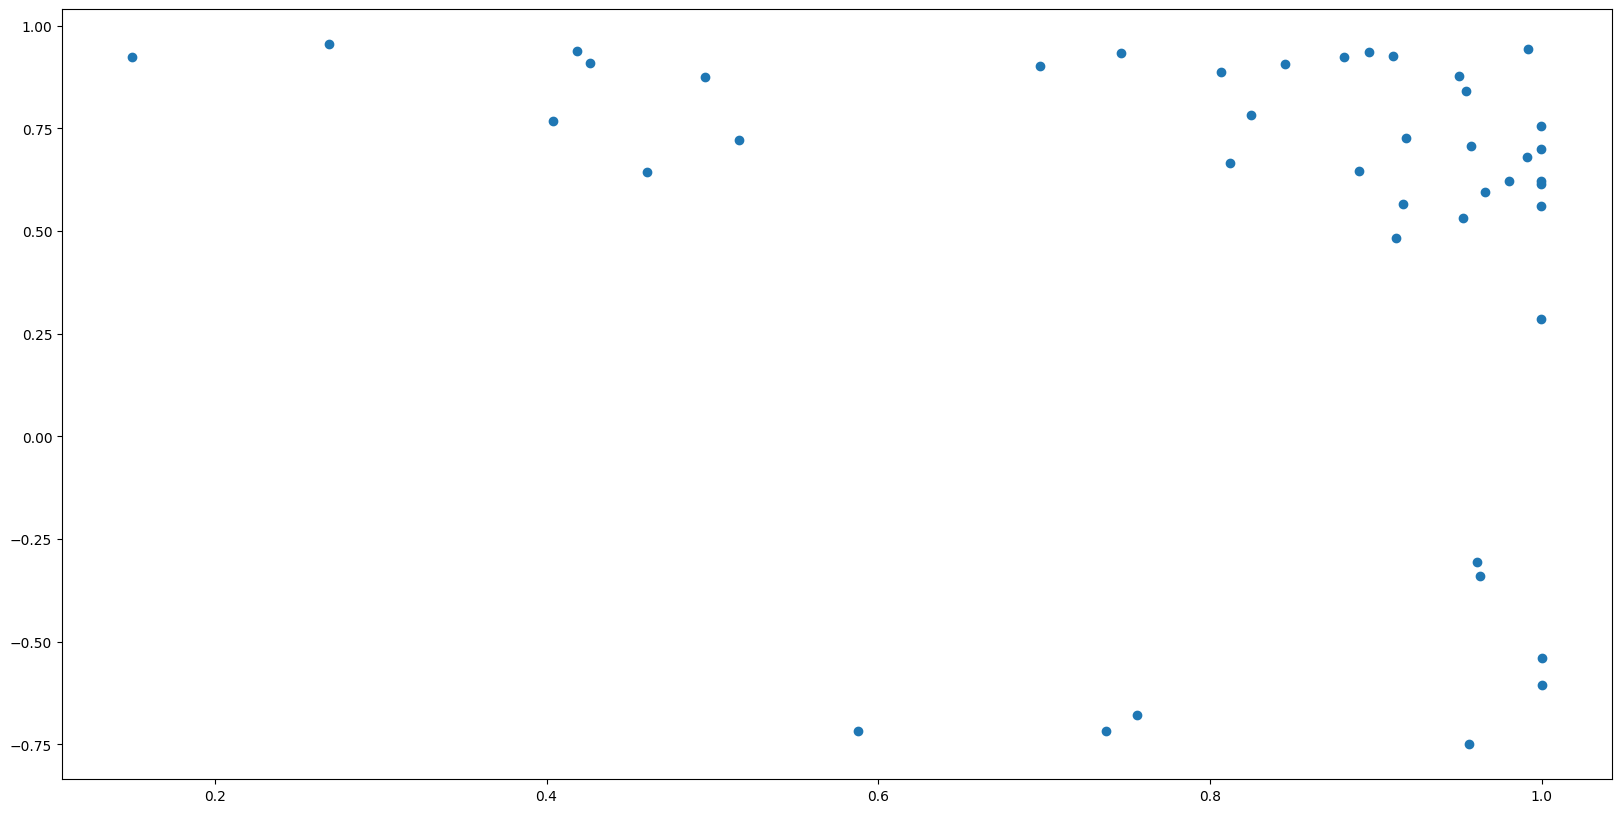

In [713]:
plt.scatter(ComprehensiveDf['Insample Cointegration Strength'],ComprehensiveDf['Correlation'])
ComprehensiveDf['Insample Cointegration Strength'].corr(ComprehensiveDf['Returns'])
ComprehensiveDf['Insample Cointegration Strength'].corr(ComprehensiveDf['Cointegration'])

In [691]:
ComprehensiveDf['Returns'].mean()

0.006374816341451174

In [562]:
(len(ComprehensiveDf.loc[ComprehensiveDf['Returns']>0])/len(ComprehensiveDf))

0.75

In [558]:
ComprehensiveDf['Cointegration'].corr(ComprehensiveDf['Insample Cointegration Strength'])

0.7418768527663941

In [537]:
ComprehensiveDf=ComprehensiveMasterDf

In [539]:
len(ComprehensiveDf.loc[ComprehensiveDf['Cointegration'] > 0.90]), len(ComprehensiveDf.loc[(ComprehensiveDf['Insample Cointegration Strength'] > 0.95) & (ComprehensiveDf['Cointegration'] > 0.95)])


(246, 9)

In [693]:
ComprehensiveDf.sort_values('Cointegration')

,Stock1,Stock2,Correlation,Cointegration,Returns,NumberOfTrades,Industry_Stock1,Industry_Stock2,SameIndustry,Insample Cointegration Strength
8,HDFCBANK.NS,MUTHOOTFIN.NS,0.908395,0.953048,0.000000,0,Financial Services,Financial Services,1,0.425922
15,AWL.NS,GODREJCP.NS,0.782817,0.953299,0.000000,0,Fast Moving Consumer Goods,Fast Moving Consumer Goods,1,0.824887
36,DABUR.NS,MARICO.NS,-0.340888,0.956085,0.000000,0,Fast Moving Consumer Goods,Fast Moving Consumer Goods,1,0.962736
17,HDFCLIFE.NS,LICI.NS,0.756509,0.957918,0.044630,1,Financial Services,Financial Services,1,0.999883
9,BOSCHLTD.NS,HEROMOTOCO.NS,0.906898,0.958619,0.000000,0,Automobile and Auto Components,Automobile and Auto Components,1,0.845139
1,CIPLA.NS,SUNPHARMA.NS,0.942101,0.962268,0.000000,0,Healthcare,Healthcare,1,0.991868
14,ONGC.NS,RELIANCE.NS,0.841567,0.962853,0.000000,0,Oil Gas & Consumable Fuels,Oil Gas & Consumable Fuels,1,0.954325
6,HDFCBANK.NS,SBILIFE.NS,0.923804,0.963220,0.046787,1,Financial Services,Financial Services,1,0.881111
5,DIVISLAB.NS,ZYDUSLIFE.NS,0.925829,0.963226,0.000000,0,Healthcare,Healthcare,1,0.910252
29,DABUR.NS,GODREJCP.NS,0.594907,0.963260,0.033222,1,Fast Moving Consumer Goods,Fast Moving Consumer Goods,1,0.966035


In [703]:
results_df.loc[results_df['Industry_Stock1']==results_df['Industry_Stock2']]['Stock 1']

17             ABB.NS
41             ABB.NS
78             ABB.NS
101     ADANIENSOL.NS
162     ADANIENSOL.NS
            ...      
4980     TATASTEEL.NS
4992         TECHM.NS
5013    TORNTPHARM.NS
5020         TRENT.NS
5035    MCDOWELL-N.NS
Name: Stock 1, Length: 450, dtype: object

In [708]:
ComprehensiveDf.loc[ComprehensiveDf['Returns']>0]['Returns'].mean()

0.04568618378040009

In [712]:
ComprehensiveDf.loc[ComprehensiveDf['Returns']>0]['Correlation'].min()

-0.7179133813124247